In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
X = np.load("../data/X.npy")
y = np.load("../data/y.npy")
embedding_matrix = np.load("../data/embedding_matrix.npy")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=(y.sum(axis=1) > 0)
)

In [16]:
## Building Model
model = Sequential([
    Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=X.shape[1],
    trainable=False,
    input_shape=(X.shape[1],)
    ),
    
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='sigmoid')
])

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 150, 100)       │    10,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,072,390 (38.42 MB)

 Trainable params: 72,390 (282.77 KB)

 Non-trainable params: 10,000,000 (38.15 MB)

In [18]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("../models/best_model.h5", save_best_only=True)
]

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    callbacks=callbacks
)

Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6551 - loss: 0.1440

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 220s 194ms/step - accuracy: 0.6552 - loss: 0.1440 - val_accuracy: 0.9939 - val_loss: 0.0570
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9330 - loss: 0.0610

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 237s 211ms/step - accuracy: 0.9330 - loss: 0.0610 - val_accuracy: 0.9939 - val_loss: 0.0546
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9673 - loss: 0.0573

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 242s 216ms/step - accuracy: 0.9673 - loss: 0.0573 - val_accuracy: 0.9939 - val_loss: 0.0521
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 271s 242ms/step - accuracy: 0.9678 - loss: 0.0541 - val_accuracy: 0.9939 - val_loss: 0.0528
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9822 - loss: 0.0537

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 259s 231ms/step - accuracy: 0.9822 - loss: 0.0537 - val_accuracy: 0.9939 - val_loss: 0.0500
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9724 - loss: 0.0514

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 258s 230ms/step - accuracy: 0.9725 - loss: 0.0514 - val_accuracy: 0.9939 - val_loss: 0.0493
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 270s 241ms/step - accuracy: 0.9794 - loss: 0.0505 - val_accuracy: 0.9939 - val_loss: 0.0495
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 289s 258ms/step - accuracy: 0.9732 - loss: 0.0498 - val_accuracy: 0.9939 - val_loss: 0.0507
Epoch 9/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 300s 268ms/step - accuracy: 0.9739 - loss: 0.0483 - val_accuracy: 0.9939 - val_loss: 0.0501


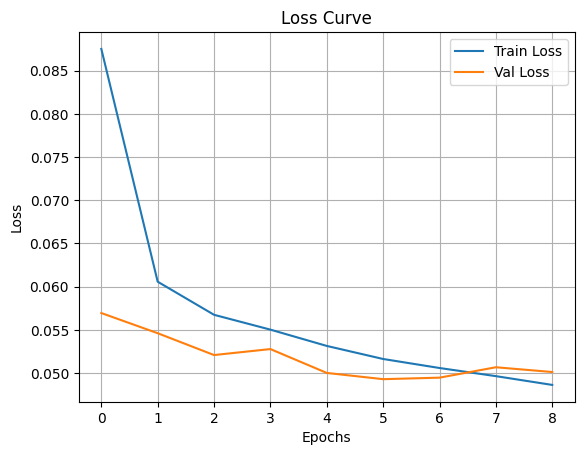

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
